In [1]:
%load_ext autoreload
%autoreload 2

# Universidad de Buenos Aires
# Deep Learning - Examen
# Abril 2023



In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image

El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 7 de mayo a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen ABRIL 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 1)^2 - (y - 5)^2 + 3$

(a) Aplicar gradiente e igualar a zero de **forma analítica** para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

(b) **Implementar un algoritmo de** SGD para encontrar la ubicación del máximo de manera numérica.

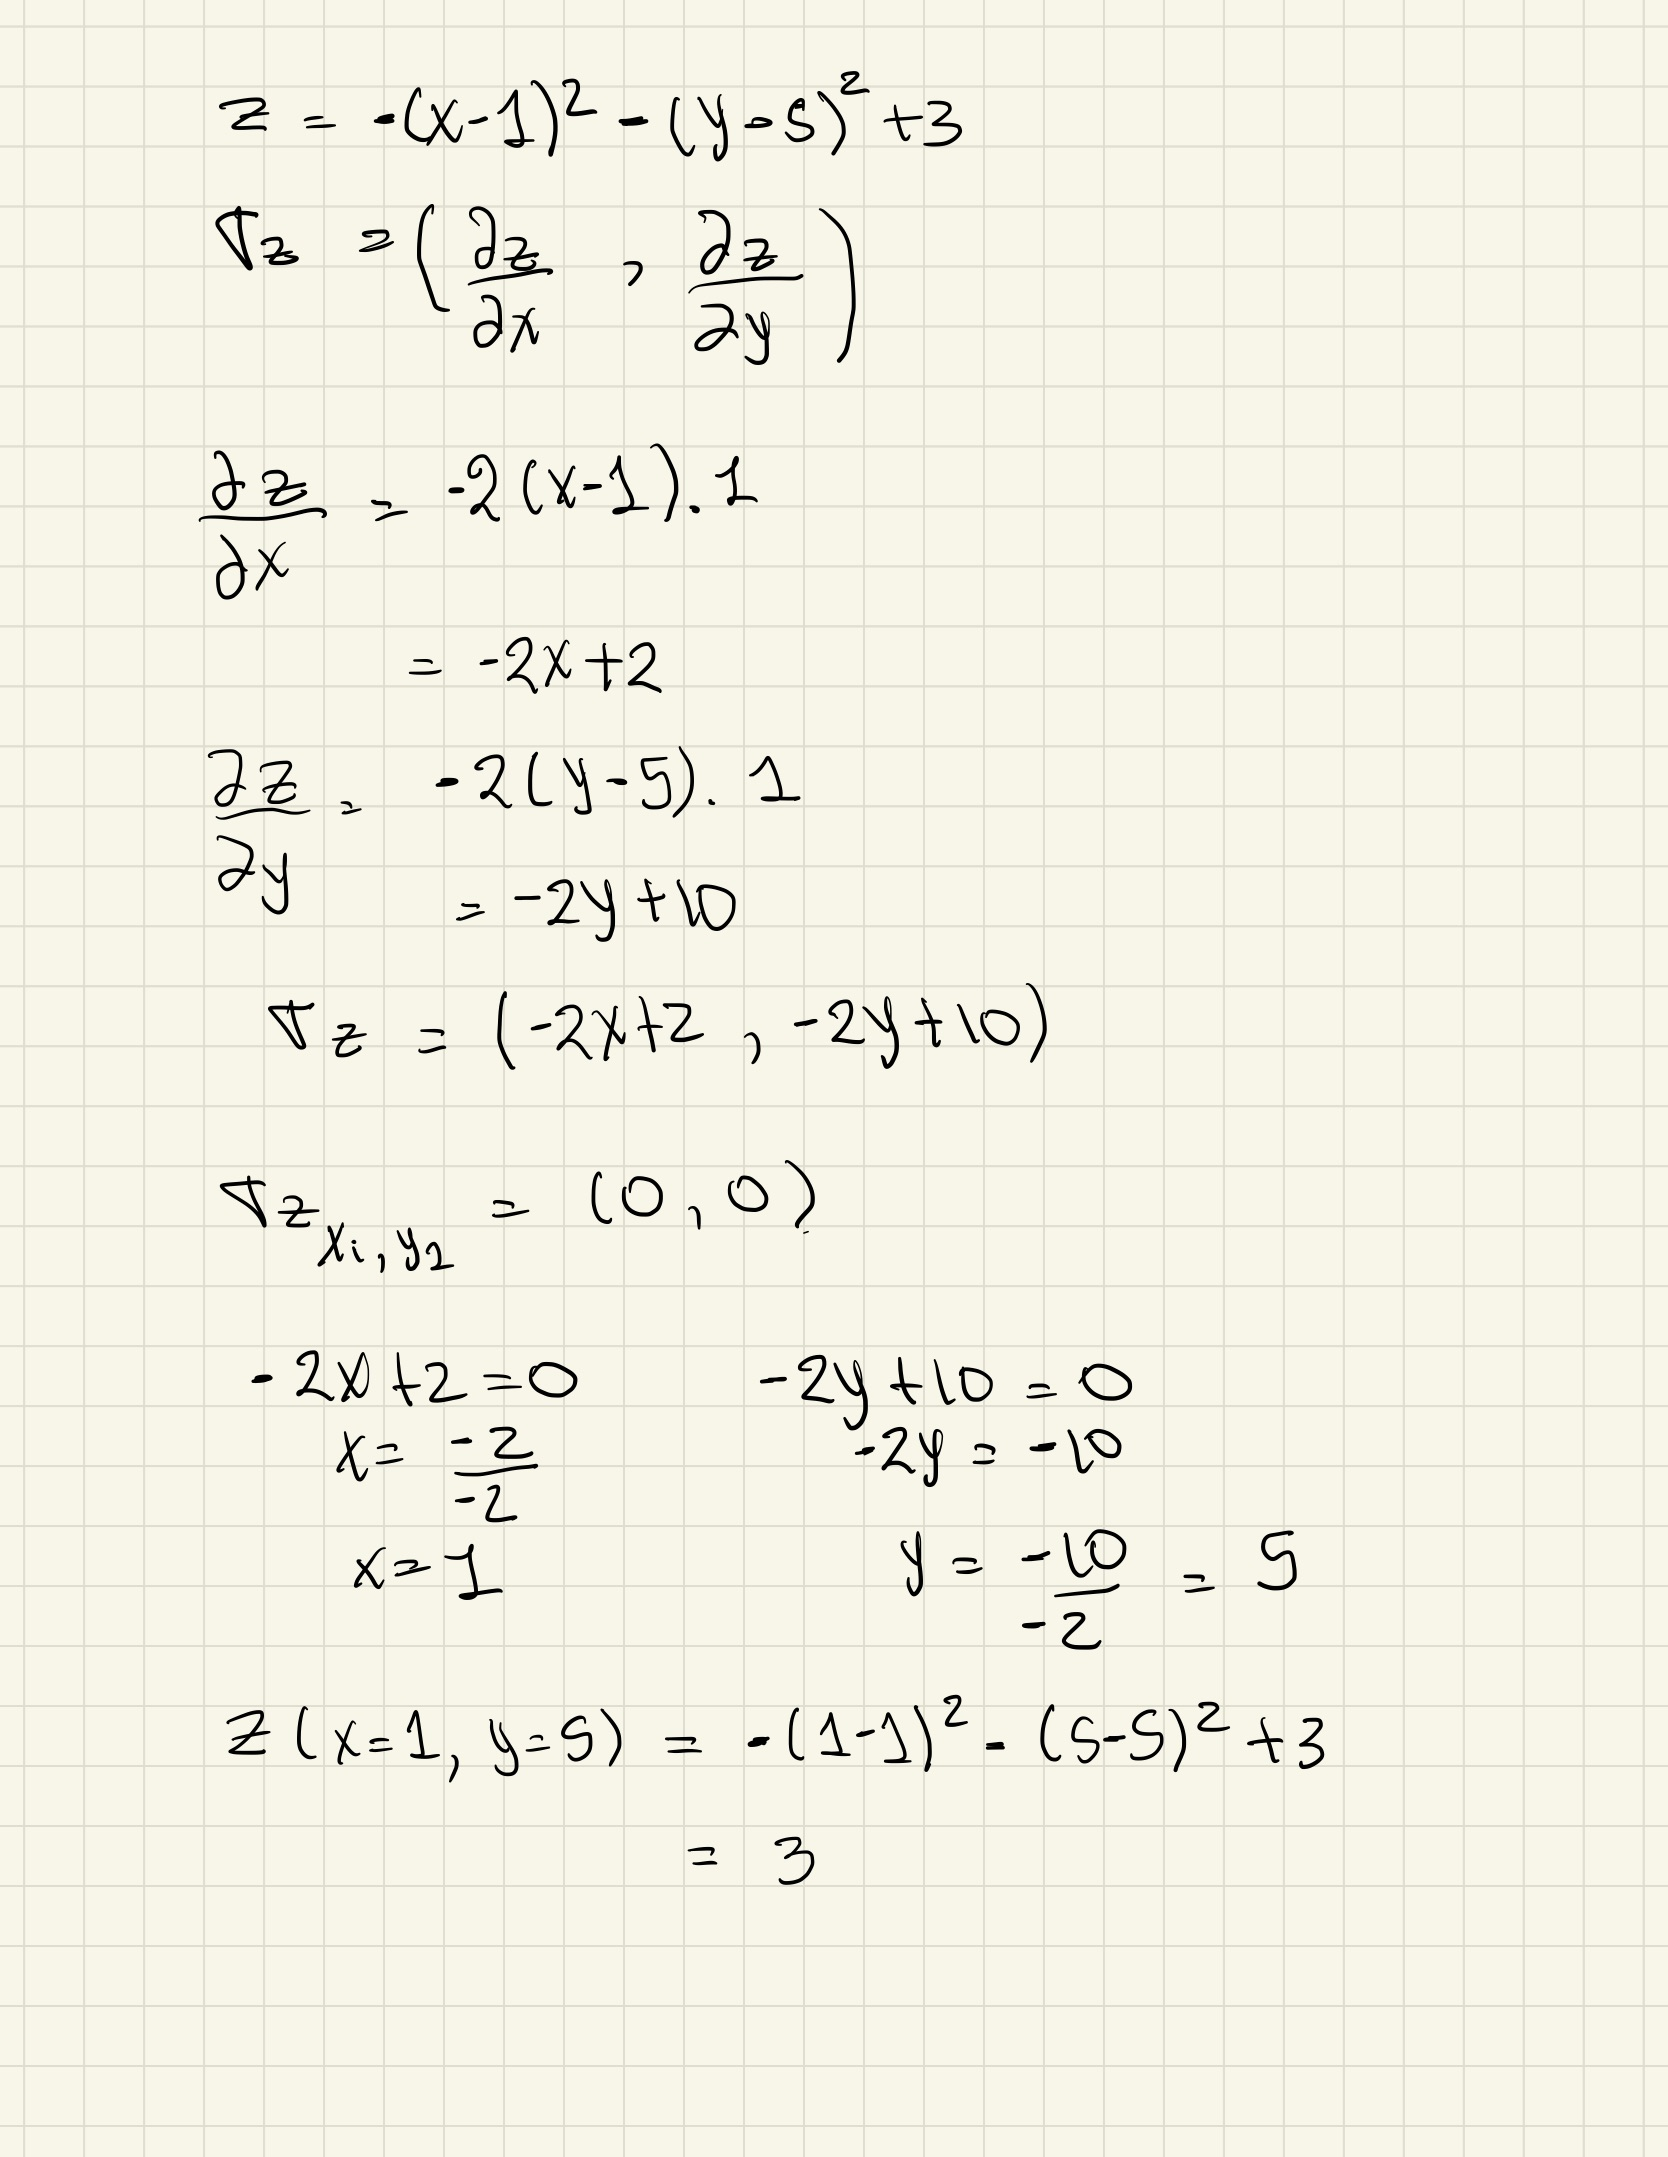

In [3]:
display(Image(filename='ejercicio1.jpg'))

## Algoritmo SGD

In [4]:
learning_rate = 0.1
epoch = 1
n_epochs = 100

x = random.randint(0, 100)
y = random.randint(0, 100)

def gradient(x,y):
    return [(-2*x)+2, (-2*y+10)]

while (epoch < n_epochs):
    g = gradient(x, y)    
    
    if (abs(g[0]) <= 0.001) and (abs(g[1]) <=0.001):
        break
    
    x = x + learning_rate * g[0] 
    y = y + learning_rate * g[1]
    
    epoch += 1

print(f"Numero de epochs: {epoch}")    
print(f"Valor x: {x}")
print(f"Valor y: {y}")

Numero de epochs: 53
Valor x: 1.0004749880321326
Valor y: 5.000018268770466


## Ejercicio 2



En las siguientes imágenes, se presenta la traslación de un objeto en la capa de entrada de una CNN (el 2 de las imágenes inferiores) y las neuronas que se activan a la salida de dicha CNN para 2 tipos de propiedadedes de las CNN: *Invarianza al desplazamiento (translational invariance)* y *equivariancia al desplazamiento (translational equivariance)*.



![a](https://docs.google.com/uc?id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

Imagen 1 link (https://drive.google.com/file/d/1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci/view?usp=sharing)



![b](https://docs.google.com/uc?id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

Imagen 2 link (https://drive.google.com/file/d/1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02/view?usp=sharing)


Preguntas:
* a) ¿Qué imagen se corresponde con cuál propiedad? 
* b) ¿Cuál/cuáles de cada capa elemental de una CNN (convolución - activación - pooling) aporta cada propiedad?





La primera imagen corresponde con equivarianza al desplazamiento, ya que permite mantener la información de las relaciones espaciales entre componentes,  la capa de convolución aporta esta propiedad.

La segunga imagen corresconte con invarianza al desplazamiento, el cual trata de identificar algo independientemente de donde está ubicado, la capa que aporta esta propiedad es la de pooling.

## Ejercicio 3





Para la siguiente red neuronal recurrente, se pide **hallar el tamaño de la salida, de los estados ocultos y nombre y tamaño del total de parámetros entrenables**, si el vector de entrada son 5 muestras secuenciadas de una señal univariada $x(t)$.

![c](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)

Imagen 3 link (https://drive.google.com/file/d/1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL/view?usp=sharing)



Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$ 
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$ 



In [1]:
import numpy as np
import torch

In [2]:
class SimpleRNN(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=1, num_layers=1):
        super().__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        y, h = self.rnn(x) 
        return y, h

In [3]:
def imp_param(model):
    print('-'*84)
    print('PARAMETROS DEL MODELO')
    print('-'*84)
    for name, param in model.named_parameters():
        if param.requires_grad: 
            print('Nombre del parámetro: ')
            print(name)
            print('Tamaño del parámetro: ')
            print(param.data.shape)
            print()

In [4]:
def teoria(model, largo_entrada = 3, batch_size=1):
    print('-'*84)
    print('MODELO')
    print('-'*84)
    print(model)
    imp_param(model)

    # Generamos una entrada aleatoria para ver como responde la red
    # el tamaño de la entrada esa acorde a los tamaños que cargamos antes
    entrada = torch.rand(batch_size, largo_entrada, input_size)
    print('-'*84)
    print('ENTRADA')
    print('-'*84)
    print('entrada shape: ', entrada.shape)
    print(entrada)

    # le agrego la dimension del batch:
    #entrada = entrada[None, :]
    print()
    print('entrada con nuevas dimensiones [batch, Length, nr_features] ')
    print(entrada.shape)

    # Pasamos la entrada a la red
    o, h = model(entrada)
    print('-'*84)
    print('SALIDA')
    print('-'*84)
    print('salida de la red (output) (largo igual al input): ', o.shape)
    print(o)
    print()
    print('hidden red (solo ultimo hidden): ', h.shape)
    print(h)

In [5]:
input_size= 1
hidden_size=2
num_layers=1
largo_entrada = 1
batch_size=5

model = SimpleRNN(input_size, hidden_size, num_layers)
teoria(model, largo_entrada, batch_size) 

------------------------------------------------------------------------------------
MODELO
------------------------------------------------------------------------------------
SimpleRNN(
  (rnn): RNN(1, 2, batch_first=True)
)
------------------------------------------------------------------------------------
PARAMETROS DEL MODELO
------------------------------------------------------------------------------------
Nombre del parámetro: 
rnn.weight_ih_l0
Tamaño del parámetro: 
torch.Size([2, 1])

Nombre del parámetro: 
rnn.weight_hh_l0
Tamaño del parámetro: 
torch.Size([2, 2])

Nombre del parámetro: 
rnn.bias_ih_l0
Tamaño del parámetro: 
torch.Size([2])

Nombre del parámetro: 
rnn.bias_hh_l0
Tamaño del parámetro: 
torch.Size([2])

------------------------------------------------------------------------------------
ENTRADA
------------------------------------------------------------------------------------
entrada shape:  torch.Size([5, 1, 1])
tensor([[[0.9464]],

        [[0.4833]],

 

## Ejercicio 4 




Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.**
- b)	Entrenar **un solo modelo** de deep learning que utilice embeddings tanto para los productos como para los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Compare el score de cada modelo y comente lo necesario.



# EDA

In [5]:
df = pd.read_csv("dataset_black_sales.csv")

In [6]:
df.shape

(550068, 12)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('int64')], dtype=object)

In [9]:
features_numeric = df.columns[df.dtypes != 'O'].tolist()
features_categorical = df.columns[df.dtypes == 'O'].tolist()

In [10]:
features_numeric

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [11]:
features_categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


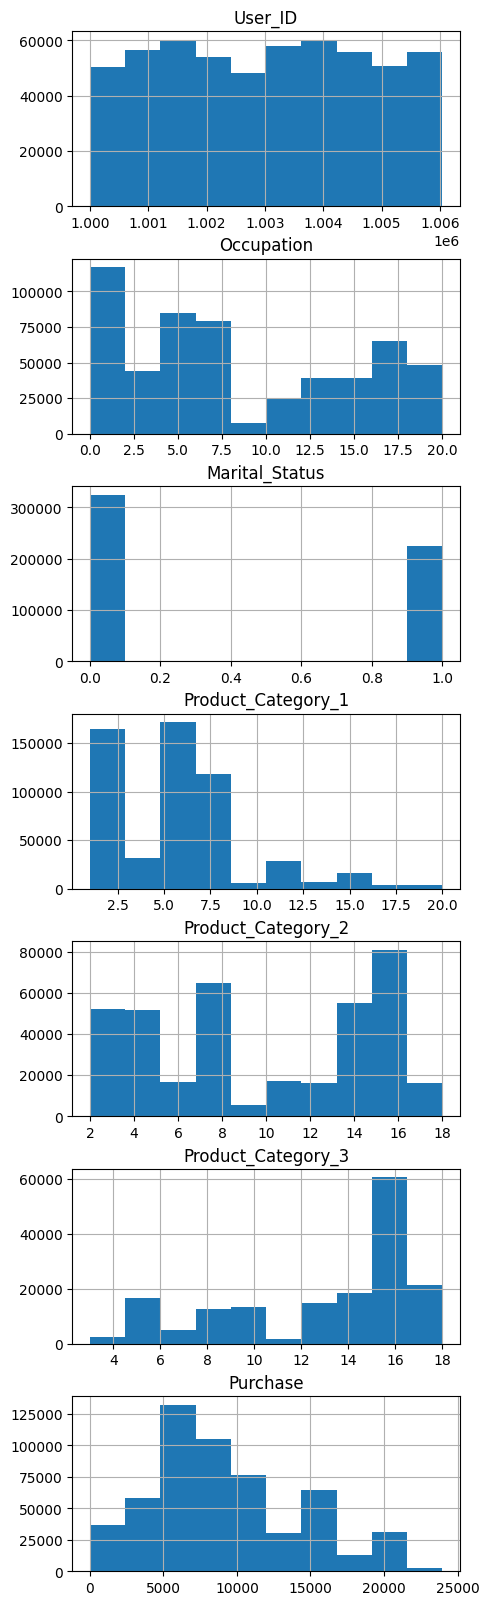

In [14]:
fig, ax = plt.subplots(len(features_numeric), figsize=(5, 20))
df[features_numeric].hist(ax = ax)
plt.show()

In [15]:
features_categorical

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [16]:
df['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [17]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [18]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [19]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [20]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [21]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics
import matplotlib.pyplot as plt

from etl import ETL
from model import fit_without_embedings, fit_with_embedings

In [22]:
df = pd.read_csv("dataset_black_sales.csv")

## Build label


- grupo 0 (gasta menos de 5000),
- al grupo 1 (gasta entre 5000 y 10000), 
- al grupo 2 (gasta entre 10000 y 15000)
- o al grupo 3 (gasta más de 15000).

In [23]:
def classification_group(amount):
    if amount < 5000:
        return 0
    elif (amount >= 5000) and (amount <= 10000):
        return 1
    elif (amount > 10000) and (amount <= 15000):
        return 2
    elif amount > 15000:
        return 3

In [24]:
df['label'] = df['Purchase'].map(lambda x: classification_group(x))

In [25]:
df.label.value_counts()

label
1    265695
3    110523
0     94923
2     78927
Name: count, dtype: int64

In [26]:
df.drop(columns=['Purchase', 'Product_ID', 'User_ID'], inplace=True)

# Model A

# Split Train / Test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( df.drop(columns='label'), df.label, test_size=0.25, random_state=42)

In [29]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [30]:
y_train = torch.from_numpy(y_train.values)
y_test = torch.from_numpy(y_test.values)

# ETL

In [31]:
X_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,36-45,7,B,1,0,8,NaN,NaN
1,M,0-17,10,C,0,0,2,8.0,18.0
2,M,26-35,12,A,1,0,5,8.0,NaN
3,M,26-35,17,B,3,0,5,6.0,NaN
4,M,51-55,17,B,1,1,1,16.0,NaN


In [32]:
etl = ETL()

In [33]:
X_train_transform = etl.generate_data(X_train)

In [34]:
X_train_transform.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,cat__Gender_M,cat__Gender_F,cat__Age_36-45,cat__Age_0-17,cat__Age_26-35,...,cat__Age_18-25,cat__Age_46-50,cat__City_Category_B,cat__City_Category_C,cat__City_Category_A,cat__Stay_In_Current_City_Years_1,cat__Stay_In_Current_City_Years_0,cat__Stay_In_Current_City_Years_3,cat__Stay_In_Current_City_Years_2,cat__Stay_In_Current_City_Years_4+
0,7,0,8,9.841684,12.660464,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10,0,2,8.000000,18.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12,0,5,8.000000,12.660464,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,17,0,5,6.000000,12.660464,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,17,1,1,16.000000,12.660464,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
X_test_transform = etl.transform_etl(X_test)

In [36]:
X_test_transform.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,cat__Gender_M,cat__Gender_F,cat__Age_36-45,cat__Age_0-17,cat__Age_26-35,...,cat__Age_18-25,cat__Age_46-50,cat__City_Category_B,cat__City_Category_C,cat__City_Category_A,cat__Stay_In_Current_City_Years_1,cat__Stay_In_Current_City_Years_0,cat__Stay_In_Current_City_Years_3,cat__Stay_In_Current_City_Years_2,cat__Stay_In_Current_City_Years_4+
0,19,0,1,2.0,16.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11,0,1,15.0,16.000000,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,8,15.0,12.660464,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,0,1,15.0,16.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,0,6,8.0,16.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
X_train_transform = X_train_transform.astype('float32').to_numpy()
X_test_transform = X_test_transform.astype('float32').to_numpy()

# Training

In [38]:
X_train_transform = torch.from_numpy(X_train_transform)
X_test_transform = torch.from_numpy(X_test_transform)

In [39]:
class MyDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [40]:
train_ds = MyDataset(X_train_transform, y_train)

In [41]:
test_ds = MyDataset(X_test_transform, y_test)

In [42]:
train_dataloader = DataLoader(train_ds, batch_size=64, shuffle = True)
test_dataloader = DataLoader(test_ds, batch_size=64, shuffle=True)

In [43]:
batch_1 = next(iter(train_dataloader))

In [44]:
type(batch_1[0])

torch.Tensor

In [45]:
class NNet(torch.nn.Module):

    def __init__(self, D_in, D_out):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=D_in, out_features=40, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features = 40, out_features=40, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features = 40, out_features=40, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features = 40, out_features=20, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features = 20, out_features= D_out, bias=True)


    def forward(self, x):
        x = self.linear_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x)
        x = self.relu_3(x)
        x = self.linear_4(x)
        x = self.relu_4(x)
        x = self.output(x)
        return x

In [46]:
nnet = NNet(X_train_transform.shape[1], 4)

In [47]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=22, out_features=40, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=40, out_features=40, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=40, out_features=40, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=40, out_features=20, bias=True)
  (relu_4): ReLU()
  (output): Linear(in_features=20, out_features=4, bias=True)
)


In [48]:
loss_function = torch.nn.CrossEntropyLoss()

In [49]:
optimizer = torch.optim.Adam(nnet.parameters(), lr = 0.001)

In [50]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

device

/root/.cache/pypoetry/virtualenvs/app-fRecfuf_-py3.8/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [51]:
n_train = X_train_transform.shape[0]
n_test = X_test_transform.shape[0]

In [52]:
print(n_train)
print(n_test)

412551
137517


In [53]:
dataloader = {
    'train': train_dataloader,
    'test': test_dataloader
}

val_loss 0.95866 val_acc 0.63989: 100%|██████████| 2149/2149 [00:05<00:00, 421.05it/s]


Epoch 1/30 loss 1.00806 val_loss 0.95866 acc 0.60551 val_acc 0.63989


val_loss 0.92729 val_acc 0.64869: 100%|██████████| 2149/2149 [00:05<00:00, 428.56it/s]


Epoch 2/30 loss 0.94067 val_loss 0.92729 acc 0.64675 val_acc 0.64869


val_loss 0.90021 val_acc 0.65812: 100%|██████████| 2149/2149 [00:05<00:00, 423.41it/s]


Epoch 3/30 loss 0.91350 val_loss 0.90021 acc 0.65134 val_acc 0.65812


val_loss 0.84615 val_acc 0.67455: 100%|██████████| 2149/2149 [00:04<00:00, 445.36it/s]


Epoch 4/30 loss 0.87382 val_loss 0.84615 acc 0.66982 val_acc 0.67455


val_loss 0.80138 val_acc 0.68901: 100%|██████████| 2149/2149 [00:04<00:00, 448.02it/s]


Epoch 5/30 loss 0.82039 val_loss 0.80138 acc 0.67900 val_acc 0.68901


val_loss 0.78395 val_acc 0.69726: 100%|██████████| 2149/2149 [00:05<00:00, 421.07it/s]


Epoch 6/30 loss 0.79115 val_loss 0.78395 acc 0.69453 val_acc 0.69726


val_loss 0.77396 val_acc 0.69813: 100%|██████████| 2149/2149 [00:04<00:00, 445.20it/s]


Epoch 7/30 loss 0.77818 val_loss 0.77396 acc 0.69780 val_acc 0.69813


val_loss 0.77158 val_acc 0.69879: 100%|██████████| 2149/2149 [00:04<00:00, 431.58it/s]


Epoch 8/30 loss 0.77216 val_loss 0.77158 acc 0.69844 val_acc 0.69879


val_loss 0.76888 val_acc 0.69913: 100%|██████████| 2149/2149 [00:04<00:00, 442.17it/s]


Epoch 9/30 loss 0.76897 val_loss 0.76888 acc 0.69898 val_acc 0.69913


val_loss 0.76867 val_acc 0.69935: 100%|██████████| 2149/2149 [00:04<00:00, 432.41it/s]


Epoch 10/30 loss 0.76676 val_loss 0.76867 acc 0.69919 val_acc 0.69935


val_loss 0.76577 val_acc 0.69963: 100%|██████████| 2149/2149 [00:04<00:00, 451.58it/s]


Epoch 11/30 loss 0.76502 val_loss 0.76577 acc 0.69965 val_acc 0.69963


val_loss 0.76639 val_acc 0.69968: 100%|██████████| 2149/2149 [00:05<00:00, 425.14it/s]


Epoch 12/30 loss 0.76355 val_loss 0.76639 acc 0.70012 val_acc 0.69968


val_loss 0.76063 val_acc 0.70076: 100%|██████████| 2149/2149 [00:04<00:00, 440.78it/s]


Epoch 13/30 loss 0.76206 val_loss 0.76063 acc 0.70048 val_acc 0.70076


val_loss 0.76221 val_acc 0.70306: 100%|██████████| 2149/2149 [00:04<00:00, 437.80it/s]


Epoch 14/30 loss 0.76068 val_loss 0.76221 acc 0.70115 val_acc 0.70306


val_loss 0.75824 val_acc 0.70371: 100%|██████████| 2149/2149 [00:05<00:00, 420.79it/s]


Epoch 15/30 loss 0.75889 val_loss 0.75824 acc 0.70182 val_acc 0.70371


val_loss 0.75751 val_acc 0.70374: 100%|██████████| 2149/2149 [00:04<00:00, 445.52it/s]


Epoch 16/30 loss 0.75704 val_loss 0.75751 acc 0.70241 val_acc 0.70374


val_loss 0.75492 val_acc 0.70385: 100%|██████████| 2149/2149 [00:04<00:00, 445.62it/s]


Epoch 17/30 loss 0.75429 val_loss 0.75492 acc 0.70322 val_acc 0.70385


val_loss 0.75300 val_acc 0.70229: 100%|██████████| 2149/2149 [00:04<00:00, 441.12it/s]


Epoch 18/30 loss 0.75151 val_loss 0.75300 acc 0.70344 val_acc 0.70229


val_loss 0.74821 val_acc 0.70372: 100%|██████████| 2149/2149 [00:04<00:00, 433.50it/s]


Epoch 19/30 loss 0.74825 val_loss 0.74821 acc 0.70371 val_acc 0.70372


val_loss 0.74624 val_acc 0.70425: 100%|██████████| 2149/2149 [00:04<00:00, 455.24it/s]


Epoch 20/30 loss 0.74494 val_loss 0.74624 acc 0.70419 val_acc 0.70425


val_loss 0.74218 val_acc 0.70571: 100%|██████████| 2149/2149 [00:04<00:00, 433.03it/s]


Epoch 21/30 loss 0.74185 val_loss 0.74218 acc 0.70517 val_acc 0.70571


val_loss 0.73836 val_acc 0.70622: 100%|██████████| 2149/2149 [00:04<00:00, 437.86it/s]


Epoch 22/30 loss 0.73909 val_loss 0.73836 acc 0.70615 val_acc 0.70622


val_loss 0.73867 val_acc 0.70627: 100%|██████████| 2149/2149 [00:04<00:00, 437.14it/s]


Epoch 23/30 loss 0.73681 val_loss 0.73867 acc 0.70709 val_acc 0.70627


val_loss 0.73574 val_acc 0.70760: 100%|██████████| 2149/2149 [00:04<00:00, 449.64it/s]


Epoch 24/30 loss 0.73486 val_loss 0.73574 acc 0.70762 val_acc 0.70760


val_loss 0.73460 val_acc 0.70691: 100%|██████████| 2149/2149 [00:05<00:00, 429.65it/s]


Epoch 25/30 loss 0.73310 val_loss 0.73460 acc 0.70800 val_acc 0.70691


val_loss 0.73005 val_acc 0.70911: 100%|██████████| 2149/2149 [00:04<00:00, 437.88it/s]


Epoch 26/30 loss 0.73183 val_loss 0.73005 acc 0.70849 val_acc 0.70911


val_loss 0.73576 val_acc 0.70775: 100%|██████████| 2149/2149 [00:05<00:00, 425.10it/s]


Epoch 27/30 loss 0.73072 val_loss 0.73576 acc 0.70872 val_acc 0.70775


val_loss 0.73119 val_acc 0.70880: 100%|██████████| 2149/2149 [00:05<00:00, 426.88it/s]


Epoch 28/30 loss 0.72977 val_loss 0.73119 acc 0.70879 val_acc 0.70880


val_loss 0.72974 val_acc 0.70827: 100%|██████████| 2149/2149 [00:04<00:00, 443.43it/s]


Epoch 29/30 loss 0.72892 val_loss 0.72974 acc 0.70952 val_acc 0.70827


val_loss 0.73122 val_acc 0.71005: 100%|██████████| 2149/2149 [00:04<00:00, 447.23it/s]


Epoch 30/30 loss 0.72797 val_loss 0.73122 acc 0.70927 val_acc 0.71005


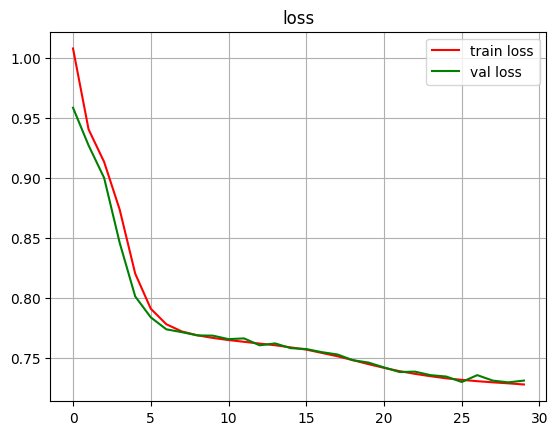

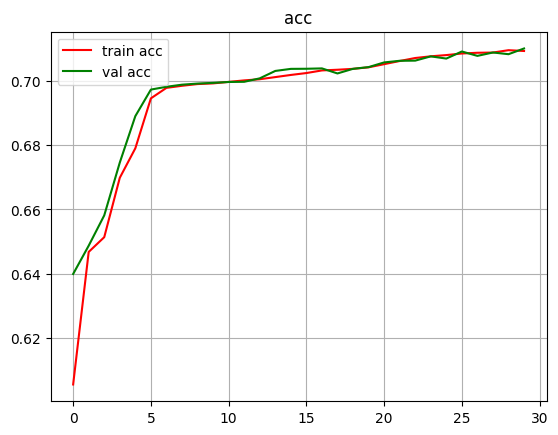

In [54]:
fit_without_embedings(nnet, dataloader, device, epochs=30)

In [55]:
# example of predictions

In [56]:
test_features, test_labels = next(iter(dataloader['test']))

In [57]:
nnet.eval()

NNet(
  (linear_1): Linear(in_features=22, out_features=40, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=40, out_features=40, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=40, out_features=40, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=40, out_features=20, bias=True)
  (relu_4): ReLU()
  (output): Linear(in_features=20, out_features=4, bias=True)
)

In [58]:
k = 5
example, label_example = test_features[k], test_labels[k]

In [59]:
y_hat = nnet(example.unsqueeze(0))
y_hat

tensor([[-4.5581, -2.5475, -5.1421, -6.8407]], grad_fn=<AddmmBackward>)

In [60]:
y_pred = torch.argmax(y_hat, axis=1).item()

In [61]:
y_pred

1

In [62]:
y_pred == label_example

tensor(True)

## Modelo B

In [63]:
df = pd.read_csv("dataset_black_sales.csv")
df['label'] = df['Purchase'].map(lambda x: classification_group(x))
df.drop(columns=['Purchase'], inplace=True)

In [64]:
df.User_ID.unique().size

5891

In [65]:
df.Product_ID.unique().size

3631

In [66]:
df.Product_ID = df.Product_ID.astype(str).str[1:].astype(int)

In [67]:
User_ID = df.User_ID
Product_ID = df.Product_ID

In [69]:
index = np.random.permutation(df.shape[0])
train_index = index[0: int(0.75 * len(index))]
test_index = index[int(0.75 * len(index)):]

In [70]:
X = df.drop(columns = ['User_ID', 'Product_ID', 'label'])
y = df.label

In [71]:
users_id_to_index = {value:i for i, value in enumerate(User_ID.unique())}
prods_id_to_index = {value:i for i, value in enumerate(Product_ID.unique())}
users_index = np.array([users_id_to_index[value] for value in User_ID])
prods_index = np.array([prods_id_to_index[value] for value in Product_ID])

In [72]:
user_index_train = users_index[train_index] 
user_index_test = users_index[test_index]
product_index_train = prods_index[train_index]
product_index_test = prods_index[test_index]

In [73]:
X_train = X.iloc[train_index].reset_index(drop=True)
y_train = y.iloc[train_index].reset_index(drop=True)
X_test = X.iloc[test_index].reset_index(drop=True)
y_test = y.iloc[test_index].reset_index(drop=True)

In [74]:
etl = ETL()

In [75]:
X_train_transform = etl.generate_data(X_train)
X_test_transform = etl.transform_etl(X_test)

In [76]:
X_train_transform = X_train_transform.astype('float32').to_numpy()
X_test_transform = X_test_transform.astype('float32').to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [77]:
X_train_transform = torch.from_numpy(X_train_transform)
X_test_transform = torch.from_numpy(X_test_transform)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [78]:
class MyDatasetWithEmbddings(Dataset):

    def __init__(self, x, users_index, prods_index, y):
        self.x = x
        self.users_idx = users_index
        self.prods_idx = prods_index
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.users_idx[index], self.prods_idx[index] , self.y[index]

In [79]:
train_ds_embeddings = MyDatasetWithEmbddings(X_train_transform, user_index_train , product_index_train , y_train)
test_ds_embeddings = MyDatasetWithEmbddings(X_test_transform, user_index_test, product_index_test, y_test)

In [80]:
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
test_dataloader_emb = DataLoader(test_ds_embeddings, batch_size=64, shuffle=True)

In [81]:
n_train = X_train_transform.shape[0]
n_test = X_test_transform.shape[0]

In [82]:
num_embeddings_User_ID = User_ID.unique().size
num_embeddings_Product_ID = Product_ID.unique().size
out_dim_User_ID = 10
out_dim_Product_ID = 10
in_num_features = X_train_transform.shape[1]

In [83]:
class NNetWithEmbeddings(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.embeddings_User_ID = torch.nn.Embedding(num_embeddings= num_embeddings_User_ID, embedding_dim= out_dim_User_ID)
        self.embeddings_Prods = torch.nn.Embedding(num_embeddings= num_embeddings_Product_ID, embedding_dim= out_dim_Product_ID)
        self.linear_1 = torch.nn.Linear(in_features= in_num_features + out_dim_User_ID + out_dim_Product_ID, out_features=40, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features = 40, out_features=120, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features = 120, out_features=8, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features = 8, out_features= 4, bias=True)


    def forward(self, x, users_index, prods_index):
        embeddings_User_ID_outputs = self.embeddings_User_ID(users_index)
        embeddings_Prods_ID_outputs = self.embeddings_Prods(prods_index)
        x = torch.cat([x, embeddings_User_ID_outputs, embeddings_Prods_ID_outputs], dim=1)
        x = self.linear_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x)
        x = self.relu_3(x)
        x = self.output(x)


        return x

In [84]:
nnetWithEmbeddings = NNetWithEmbeddings()
nnetWithEmbeddings = nnetWithEmbeddings.to(device)

In [85]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.01) 

In [86]:
dataloader_emb = {
    'train': train_dataloader_emb,
    'test': test_dataloader_emb
}

val_loss 0.95686 val_acc 0.62611: 100%|██████████| 2149/2149 [00:06<00:00, 321.82it/s]


Epoch 1/30 loss 1.02016 val_loss 0.95686 acc 0.59952 val_acc 0.62611


val_loss 0.88820 val_acc 0.65354: 100%|██████████| 2149/2149 [00:06<00:00, 336.41it/s]


Epoch 2/30 loss 0.92099 val_loss 0.88820 acc 0.63730 val_acc 0.65354


val_loss 0.82888 val_acc 0.67385: 100%|██████████| 2149/2149 [00:06<00:00, 320.53it/s]


Epoch 3/30 loss 0.85728 val_loss 0.82888 acc 0.66432 val_acc 0.67385


val_loss 0.78827 val_acc 0.69028: 100%|██████████| 2149/2149 [00:06<00:00, 323.56it/s]


Epoch 4/30 loss 0.80748 val_loss 0.78827 acc 0.68415 val_acc 0.69028


val_loss 0.75603 val_acc 0.70072: 100%|██████████| 2149/2149 [00:06<00:00, 329.00it/s]


Epoch 5/30 loss 0.77003 val_loss 0.75603 acc 0.69599 val_acc 0.70072


val_loss 0.73380 val_acc 0.70636: 100%|██████████| 2149/2149 [00:06<00:00, 328.10it/s]


Epoch 6/30 loss 0.74226 val_loss 0.73380 acc 0.70452 val_acc 0.70636


val_loss 0.71338 val_acc 0.71184: 100%|██████████| 2149/2149 [00:06<00:00, 321.78it/s]


Epoch 7/30 loss 0.72094 val_loss 0.71338 acc 0.71001 val_acc 0.71184


val_loss 0.69900 val_acc 0.71623: 100%|██████████| 2149/2149 [00:06<00:00, 313.83it/s]


Epoch 8/30 loss 0.70378 val_loss 0.69900 acc 0.71459 val_acc 0.71623


val_loss 0.68739 val_acc 0.71914: 100%|██████████| 2149/2149 [00:06<00:00, 319.23it/s]


Epoch 9/30 loss 0.68992 val_loss 0.68739 acc 0.71822 val_acc 0.71914


val_loss 0.67618 val_acc 0.72141: 100%|██████████| 2149/2149 [00:06<00:00, 318.98it/s]


Epoch 10/30 loss 0.67891 val_loss 0.67618 acc 0.72158 val_acc 0.72141


val_loss 0.66869 val_acc 0.72507: 100%|██████████| 2149/2149 [00:06<00:00, 314.18it/s]


Epoch 11/30 loss 0.66911 val_loss 0.66869 acc 0.72423 val_acc 0.72507


val_loss 0.66213 val_acc 0.72702: 100%|██████████| 2149/2149 [00:06<00:00, 326.00it/s]


Epoch 12/30 loss 0.66073 val_loss 0.66213 acc 0.72722 val_acc 0.72702


val_loss 0.65784 val_acc 0.72904: 100%|██████████| 2149/2149 [00:06<00:00, 312.88it/s]


Epoch 13/30 loss 0.65355 val_loss 0.65784 acc 0.72954 val_acc 0.72904


val_loss 0.64931 val_acc 0.73181: 100%|██████████| 2149/2149 [00:06<00:00, 321.86it/s]


Epoch 14/30 loss 0.64716 val_loss 0.64931 acc 0.73185 val_acc 0.73181


val_loss 0.64681 val_acc 0.73317: 100%|██████████| 2149/2149 [00:06<00:00, 318.78it/s]


Epoch 15/30 loss 0.64144 val_loss 0.64681 acc 0.73369 val_acc 0.73317


val_loss 0.64212 val_acc 0.73513: 100%|██████████| 2149/2149 [00:06<00:00, 310.00it/s]


Epoch 16/30 loss 0.63647 val_loss 0.64212 acc 0.73577 val_acc 0.73513


val_loss 0.63842 val_acc 0.73594: 100%|██████████| 2149/2149 [00:06<00:00, 317.97it/s]


Epoch 17/30 loss 0.63197 val_loss 0.63842 acc 0.73782 val_acc 0.73594


val_loss 0.63779 val_acc 0.73615: 100%|██████████| 2149/2149 [00:06<00:00, 307.60it/s]


Epoch 18/30 loss 0.62791 val_loss 0.63779 acc 0.73873 val_acc 0.73615


val_loss 0.63476 val_acc 0.73707: 100%|██████████| 2149/2149 [00:06<00:00, 312.08it/s]


Epoch 19/30 loss 0.62412 val_loss 0.63476 acc 0.74025 val_acc 0.73707


val_loss 0.63051 val_acc 0.73808: 100%|██████████| 2149/2149 [00:06<00:00, 321.94it/s]


Epoch 20/30 loss 0.62081 val_loss 0.63051 acc 0.74131 val_acc 0.73808


val_loss 0.62952 val_acc 0.73923: 100%|██████████| 2149/2149 [00:06<00:00, 310.70it/s]


Epoch 21/30 loss 0.61771 val_loss 0.62952 acc 0.74213 val_acc 0.73923


val_loss 0.62504 val_acc 0.74086: 100%|██████████| 2149/2149 [00:06<00:00, 321.57it/s]


Epoch 22/30 loss 0.61521 val_loss 0.62504 acc 0.74346 val_acc 0.74086


val_loss 0.62370 val_acc 0.74103: 100%|██████████| 2149/2149 [00:06<00:00, 307.94it/s]


Epoch 23/30 loss 0.61268 val_loss 0.62370 acc 0.74468 val_acc 0.74103


val_loss 0.62442 val_acc 0.74148: 100%|██████████| 2149/2149 [00:06<00:00, 310.74it/s]


Epoch 24/30 loss 0.61020 val_loss 0.62442 acc 0.74479 val_acc 0.74148


val_loss 0.62075 val_acc 0.74282: 100%|██████████| 2149/2149 [00:06<00:00, 308.66it/s]


Epoch 25/30 loss 0.60816 val_loss 0.62075 acc 0.74609 val_acc 0.74282


val_loss 0.61927 val_acc 0.74340: 100%|██████████| 2149/2149 [00:06<00:00, 311.78it/s]


Epoch 26/30 loss 0.60632 val_loss 0.61927 acc 0.74622 val_acc 0.74340


val_loss 0.61973 val_acc 0.74251: 100%|██████████| 2149/2149 [00:06<00:00, 321.26it/s]


Epoch 27/30 loss 0.60432 val_loss 0.61973 acc 0.74712 val_acc 0.74251


val_loss 0.61717 val_acc 0.74410: 100%|██████████| 2149/2149 [00:06<00:00, 312.01it/s]


Epoch 28/30 loss 0.60263 val_loss 0.61717 acc 0.74742 val_acc 0.74410


val_loss 0.61919 val_acc 0.74296: 100%|██████████| 2149/2149 [00:06<00:00, 310.11it/s]


Epoch 29/30 loss 0.60138 val_loss 0.61919 acc 0.74823 val_acc 0.74296


val_loss 0.61653 val_acc 0.74391: 100%|██████████| 2149/2149 [00:06<00:00, 307.26it/s]


Epoch 30/30 loss 0.59985 val_loss 0.61653 acc 0.74854 val_acc 0.74391


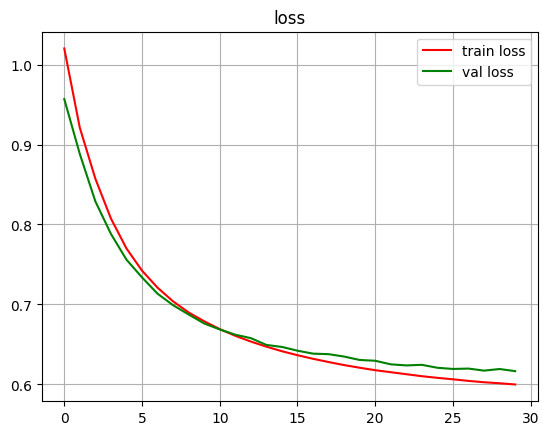

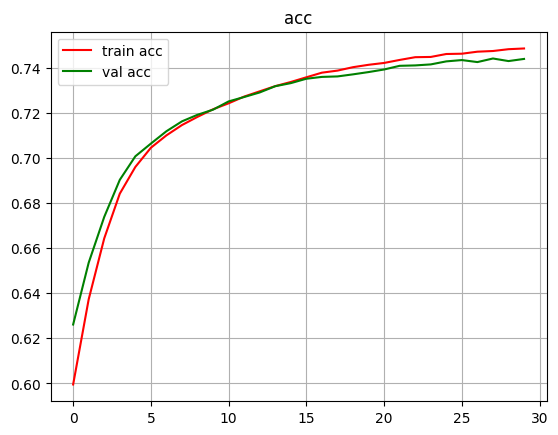

In [87]:
fit_with_embedings(nnetWithEmbeddings, dataloader_emb, device, epochs=30)

In [88]:
# example of predictions

In [89]:
test_features, test_user_index, test_product_id_index, test_labels = next(iter(dataloader_emb['test']))

In [90]:
nnetWithEmbeddings.eval()

NNetWithEmbeddings(
  (embeddings_User_ID): Embedding(5891, 10)
  (embeddings_Prods): Embedding(3631, 10)
  (linear_1): Linear(in_features=42, out_features=40, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=40, out_features=120, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=120, out_features=8, bias=True)
  (relu_3): ReLU()
  (output): Linear(in_features=8, out_features=4, bias=True)
)

In [91]:
k = 5
f1, f2, f3, label_example = test_features[k], test_user_index[k], test_product_id_index[k], test_labels[k]

In [92]:
y_hat = nnetWithEmbeddings(f1.unsqueeze(0), f2.unsqueeze(0), f3.unsqueeze(0))
y_hat

tensor([[  0.4469,   2.5819,  -5.4442, -11.5089]], grad_fn=<AddmmBackward>)

In [93]:
y_pred = torch.argmax(y_hat, axis=1).item()

In [94]:
y_pred

1

In [95]:
y_pred == label_example

tensor(True)

## Conclusiones

El modelo entrenado con enmbeding la metrica usada en este caso el accuracy aumenta en casi un 3%, el tiempo de entrenamiento con embedings es significativamente mayor ya que este modelo tiene más parámetros entrenables.